In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
dataset=pd.read_csv("Mall_Customers.csv")

In [5]:
dataset


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
X=dataset.iloc[:,[3,4]].values

In [7]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [8]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs

In [33]:
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=[0.5, 1.0, 0.7, 0.3], random_state=42)

In [34]:
clustering = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
clustering.fit_predict(X)

array([-1, -1,  2, -1,  3,  3,  0, -1, -1,  3,  3, -1, -1,  3,  3,  3, -1,
       -1,  3,  3,  3,  3,  2, -1,  2,  1, -1,  3, -1, -1,  3,  3, -1, -1,
       -1,  0,  2, -1,  2, -1,  3,  1,  3,  3, -1,  0, -1,  3, -1, -1, -1,
        1,  2,  0, -1, -1,  3,  3,  1,  0,  2, -1,  3,  2, -1,  3,  0, -1,
        2, -1, -1,  2, -1,  3, -1,  3,  0,  1,  3,  1, -1,  0,  3,  2, -1,
        2,  2, -1,  0, -1,  3, -1, -1,  0, -1, -1,  1,  0,  3, -1,  2, -1,
       -1,  3, -1,  0, -1,  3,  3, -1,  0,  3, -1,  2,  1, -1, -1, -1, -1,
       -1, -1,  3, -1,  2, -1,  0, -1, -1,  0, -1,  3,  3, -1, -1, -1,  0,
        3,  3, -1,  3, -1,  1, -1, -1,  0, -1,  0,  2,  3,  3, -1,  2, -1,
       -1,  3, -1, -1,  0,  0, -1, -1,  0,  0, -1,  1,  3,  0,  0,  3,  0,
        2, -1,  3,  3, -1,  3, -1,  1,  1,  3, -1,  3,  2, -1, -1, -1,  0,
        0, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1,  3,  0])

In [15]:
clustering

OPTICS(min_cluster_size=0.05, min_samples=10)

In [16]:
labels = clustering.labels_
reachability_distances = clustering.reachability_[clustering.ordering_]
ordered_indices = clustering.ordering_

In [17]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Spending Score (1-100)')

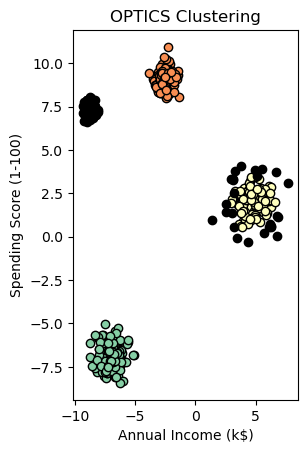

In [18]:
plt.subplot(1, 2, 1)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:  # Noise points
        col = [0, 0, 0, 1]  # Black color for noise
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('OPTICS Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

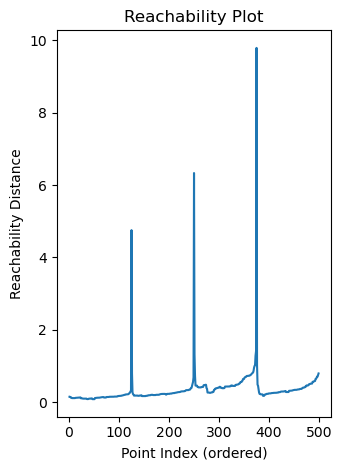

In [19]:
plt.subplot(1, 2, 2)
plt.plot(reachability_distances)
plt.title('Reachability Plot')
plt.xlabel('Point Index (ordered)')
plt.ylabel('Reachability Distance')

plt.tight_layout()
plt.show()

In [35]:
model=clustering.fit_predict(X)

In [36]:
model

array([-1, -1,  2, -1,  3,  3,  0, -1, -1,  3,  3, -1, -1,  3,  3,  3, -1,
       -1,  3,  3,  3,  3,  2, -1,  2,  1, -1,  3, -1, -1,  3,  3, -1, -1,
       -1,  0,  2, -1,  2, -1,  3,  1,  3,  3, -1,  0, -1,  3, -1, -1, -1,
        1,  2,  0, -1, -1,  3,  3,  1,  0,  2, -1,  3,  2, -1,  3,  0, -1,
        2, -1, -1,  2, -1,  3, -1,  3,  0,  1,  3,  1, -1,  0,  3,  2, -1,
        2,  2, -1,  0, -1,  3, -1, -1,  0, -1, -1,  1,  0,  3, -1,  2, -1,
       -1,  3, -1,  0, -1,  3,  3, -1,  0,  3, -1,  2,  1, -1, -1, -1, -1,
       -1, -1,  3, -1,  2, -1,  0, -1, -1,  0, -1,  3,  3, -1, -1, -1,  0,
        3,  3, -1,  3, -1,  1, -1, -1,  0, -1,  0,  2,  3,  3, -1,  2, -1,
       -1,  3, -1, -1,  0,  0, -1, -1,  0,  0, -1,  1,  3,  0,  0,  3,  0,
        2, -1,  3,  3, -1,  3, -1,  1,  1,  3, -1,  3,  2, -1, -1, -1,  0,
        0, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1,  3,  0])

In [37]:
supervised=pd.DataFrame(dataset)

In [38]:
supervised['cluster_group']=model

In [39]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,3
